# Resultados - Proposta

...

In [1]:
import pandas as pd
import math

from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-08-21 17:24'

## Erro para todas as safras

In [2]:
train_test_results_df = pd.read_csv("Data/proposta_results_all.csv")

train_test_results_df.head(40)

,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,0,116,NaN,75.368,40.632,1
1,1,7,82,NaN,93.720,11.720,1
2,2,15,82,NaN,75.320,6.680,1
3,3,29,68,NaN,67.805,0.195,1
4,4,37,82,NaN,77.060,4.940,1
5,5,43,116,NaN,97.880,18.120,1
6,6,47,82,NaN,79.200,2.800,1
7,7,48,82,NaN,81.240,0.760,1
8,8,51,82,NaN,78.620,3.380,1
9,9,56,82,NaN,79.260,2.740,1


<Axes: title={'center': "Distribuição de 'dia relativo da safra' ocorrido (ML) >2024-08-21 17:24<"}, ylabel='Frequency'>

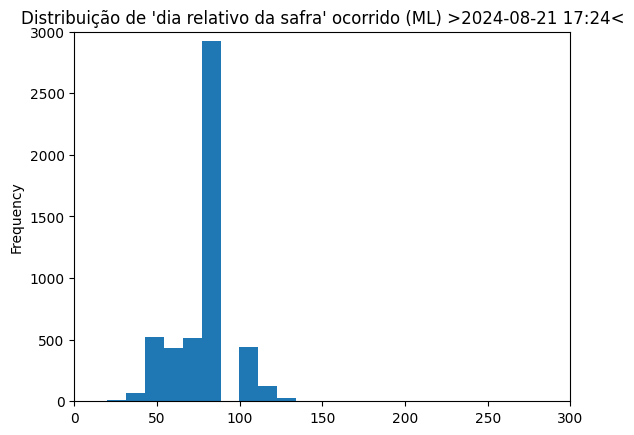

In [3]:
train_test_results_df["planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' ocorrido (ML) >{current_datetime_gen}<")

<Axes: title={'center': "Distribuição de 'dia relativo da safra' predito (ML) >2024-08-21 17:24<"}, ylabel='Frequency'>

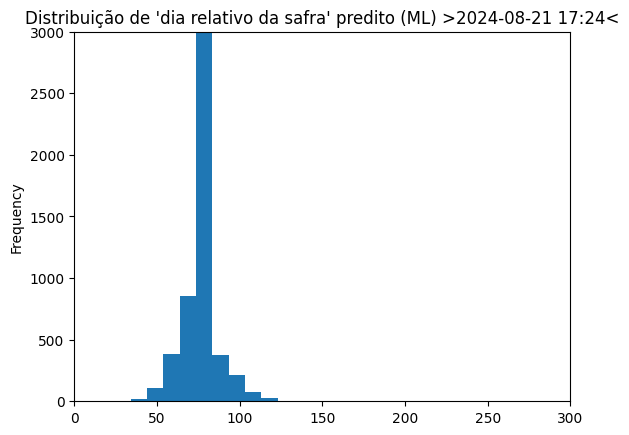

In [4]:
train_test_results_df["predicted_planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' predito (ML) >{current_datetime_gen}<")

In [5]:
K_FOLDS = 5

each_fold_error_list = []


for k_num in range(1, K_FOLDS + 1):
    df = train_test_results_df.copy()
    df = df[df["fold"] == k_num]
    
    df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
    
    error_rmse = {
        'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
    }

    print(f"=====> Fold: {k_num}")
    print(f"=====> Average error: {error_rmse['error']}")
    print()

    each_fold_error_list.append({
        "fold": k_num,
        "error": error_rmse['error'],
    })

each_fold_error_list

=====> Fold: 1
=====> Average error: 12.652303734158652

=====> Fold: 2
=====> Average error: 12.697188134081237

=====> Fold: 3
=====> Average error: 12.54240801327182

=====> Fold: 4
=====> Average error: 12.236314372530714

=====> Fold: 5
=====> Average error: 12.79687180039052



[{'fold': 1, 'error': 12.652303734158652},
 {'fold': 2, 'error': 12.697188134081237},
 {'fold': 3, 'error': 12.54240801327182},
 {'fold': 4, 'error': 12.236314372530714},
 {'fold': 5, 'error': 12.79687180039052}]

Erro para todas as safras: 12.585017210886587


[Text(0, 0, '12.585')]

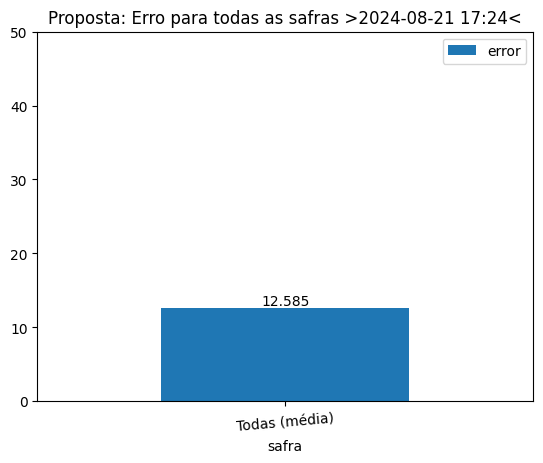

In [6]:
each_fold_error_df = pd.DataFrame(each_fold_error_list)

error = each_fold_error_df["error"].mean()
error_df = pd.DataFrame([{
    "safra": "Todas (média)",
    "error": error,
}])

print(f"Erro para todas as safras: {error}")

ax = error_df.plot(x="safra", y="error", kind="bar", ylim=(0, 50), rot=5, fontsize=10, title=f"Proposta: Erro para todas as safras >{current_datetime_gen}<")
ax.bar_label(ax.containers[0])


## Erros para cada safra

In [7]:
train_test_results_safra_df = pd.read_csv("Data/proposta_results_harvest_all.csv")
safras = train_test_results_safra_df["safra"].unique()

print(safras)
train_test_results_safra_df.head()

['2021/2022' '2020/2021' '2019/2020' '2018/2019' '2017/2018' '2016/2017'
 '2015/2016' '2014/2015' '2013/2014' '2012/2013' '2011/2012' '2010/2011'
 '2009/2010' '2008/2009' '2007/2008' '2006/2007' '2005/2006' '2004/2005']


,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,6,104,2021/2022,100.44,3.56,1
1,1,8,56,2021/2022,92.90,36.90,1
2,2,10,104,2021/2022,102.38,1.62,1
3,3,17,82,2021/2022,91.46,9.46,1
4,0,4,82,2021/2022,74.46,7.54,2


In [8]:
K_FOLDS = 5

each_safra_fold_error_list = []

for safra in safras:
    for k_num in range(1, K_FOLDS + 1):
        df = train_test_results_safra_df.copy()
        df = df[df["fold"] == k_num]
        df = df[df["safra"] == safra]
        
        # calculating average accuracy for 5d, 10d and 15d
        df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
        
        error_rmse = {
            'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
        }
    
        print(f"=====> Fold: {k_num}")
        print(f"=====> Average error: {error_rmse['error']}")
        print()
    
        each_safra_fold_error_list.append({
            "safra": safra,
            "fold": k_num,
            "error": error_rmse['error'],
        })

each_safra_fold_error_df = pd.DataFrame(each_safra_fold_error_list)
each_safra_fold_error_df

=====> Fold: 1
=====> Average error: 19.146798688031378

=====> Fold: 2
=====> Average error: 15.74911108602641

=====> Fold: 3
=====> Average error: 21.206359895088077

=====> Fold: 4
=====> Average error: 17.57879025037464

=====> Fold: 5
=====> Average error: 16.985805838993926

=====> Fold: 1
=====> Average error: 13.384271366047535

=====> Fold: 2
=====> Average error: 14.710064581775296

=====> Fold: 3
=====> Average error: 9.766297148868654

=====> Fold: 4
=====> Average error: 8.864789901627676

=====> Fold: 5
=====> Average error: 14.603001746216425

=====> Fold: 1
=====> Average error: 20.42538877638971

=====> Fold: 2
=====> Average error: 17.980829473954437

=====> Fold: 3
=====> Average error: 22.23529305277664

=====> Fold: 4
=====> Average error: 14.901420833502515

=====> Fold: 5
=====> Average error: 15.839848484123829

=====> Fold: 1
=====> Average error: 18.794089496434776

=====> Fold: 2
=====> Average error: 19.317923456382847

=====> Fold: 3
=====> Average error: 

,safra,fold,error
0,2021/2022,1,19.146799
1,2021/2022,2,15.749111
2,2021/2022,3,21.206360
3,2021/2022,4,17.578790
4,2021/2022,5,16.985806
...,...,...,...
85,2004/2005,1,14.465907
86,2004/2005,2,12.064497
87,2004/2005,3,11.190509
88,2004/2005,4,7.076347


In [9]:
df = each_safra_fold_error_df.copy()
df = df[["safra", "error"]].groupby("safra", as_index=False).mean()

each_safra_fold_error_df = df
each_safra_fold_error_df.head(40)

,safra,error
0,2004/2005,11.777786
1,2005/2006,11.635327
2,2006/2007,10.611150
3,2007/2008,11.494038
4,2008/2009,11.173341
5,2009/2010,11.589100
6,2010/2011,15.465446
7,2011/2012,16.350308
8,2012/2013,12.354965
9,2013/2014,9.118391


<Axes: title={'center': 'Proposta: Erros para cada safra >2024-08-21 17:24<'}, xlabel='safra'>

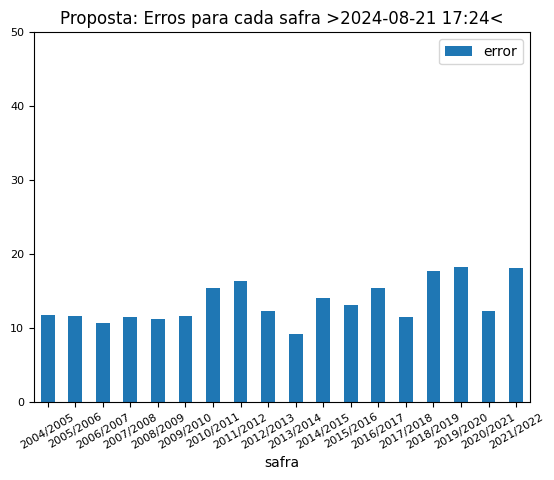

In [10]:
each_safra_fold_error_df.plot(
    x="safra", y="error", 
    ylim=(0, 50), kind="bar", 
    rot=30, fontsize=8, 
    title=f"Proposta: Erros para cada safra >{current_datetime_gen}<"
)